In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_cost=pd.read_csv("insurance.csv")

In [3]:
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
ec=LabelEncoder()
insurance_cost['sex']=ec.fit_transform(insurance_cost['sex'])
insurance_cost['smoker']=ec.fit_transform(insurance_cost['smoker'])
insurance_cost['region']=ec.fit_transform(insurance_cost['region'])

In [9]:
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

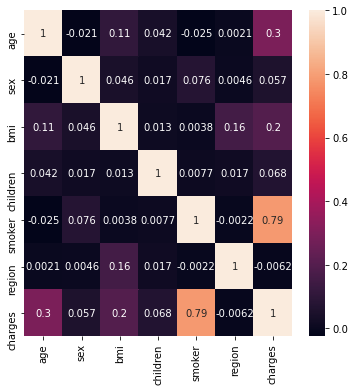

In [10]:
correlation=insurance_cost.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)

In [11]:
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


C:\Users\Mohammed Kamran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


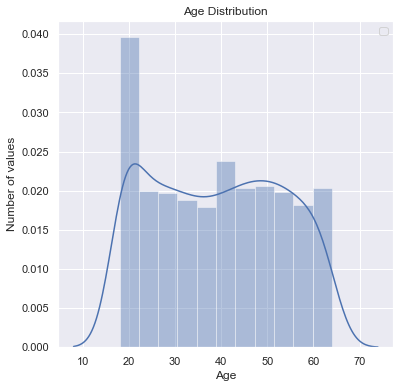

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_cost['age'])
plt.xlabel("Age")
plt.ylabel("Number of values")
plt.title("Age Distribution")
plt.legend()
plt.show()

C:\Users\Mohammed Kamran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


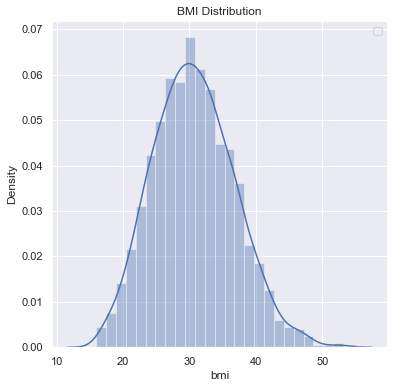

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_cost['bmi'])
plt.title("BMI Distribution")
plt.legend()
plt.show()

C:\Users\Mohammed Kamran\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


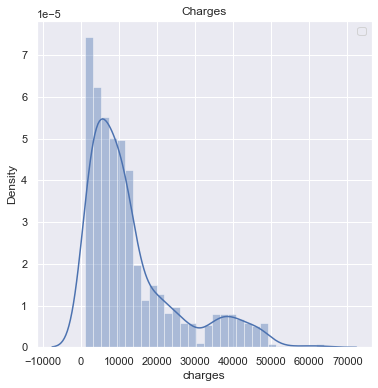

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_cost['charges'])
plt.title("Charges")
plt.legend()
plt.show()

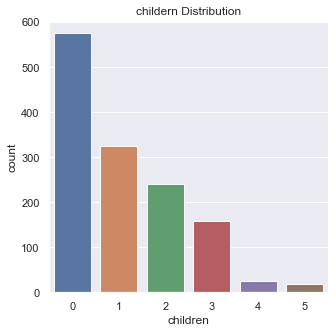

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_cost)
plt.title("childern Distribution")
plt.show()

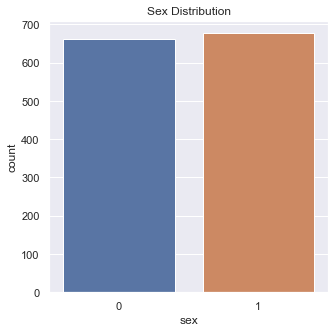

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_cost)
plt.title("Sex Distribution")
plt.show()

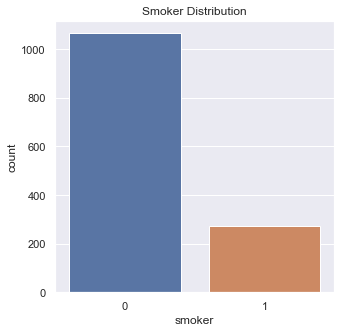

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_cost)
plt.title("Smoker Distribution")
plt.show()

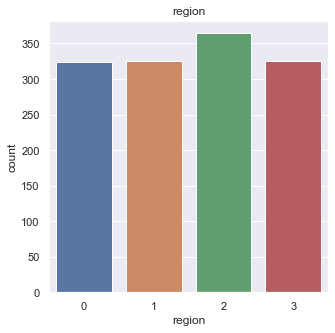

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_cost)
plt.title("region")
plt.show()

In [19]:
insurance_cost['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [20]:
insurance_cost['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
insurance_cost['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [22]:
insurance_cost['region'].value_counts()

2    364
1    325
3    325
0    324
Name: region, dtype: int64

In [23]:
X=insurance_cost.drop(['charges'],axis=1)
y=insurance_cost['charges']

In [24]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [25]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train.shape

(1070, 6)

In [28]:
X_test.shape

(268, 6)

In [29]:
X.shape

(1338, 6)

In [30]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
X_train_prediction=model.predict(X_train)
score=metrics.r2_score(y_train,X_train_prediction)
print(score)

0.7519923667088932


In [32]:
X_test_prediction=model.predict(X_test)
score=metrics.r2_score(y_test,X_test_prediction)
print(score)

0.7445422986536503


In [33]:
from xgboost import XGBRegressor

In [34]:
model1=XGBRegressor()

In [35]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
X_train_prediction=model1.predict(X_train)
score1=metrics.r2_score(y_train,X_train_prediction)
print(score1)

0.9957660171907602


In [37]:
X_test_prediction=model1.predict(X_test)
score1=metrics.r2_score(y_test,X_test_prediction)
print(score1)

0.8244198401779491


In [38]:
insurance_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [39]:
input_data=(18,1,33.770,1,0,2)
input_data_as_np_array=np.asarray(input_data)
input_data_reshaped=input_data_as_np_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[3853.31683494]
